<a href="https://colab.research.google.com/github/sperezconstanzo/DigitalHouse-DataScience-tp/blob/main/desafio_1/analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío 1 - Análisis exploratorio de precios de propiedades

---

## Dataset

En este desafío se nos propone trabajar con un Dataset del primer semestre de 2017 de la inmobiliaria <a href=https://www.properati.com.ar>Properati</a>.

El dataset contiene información sobre todas las propiedades georeferenciadas de la base
de datos de la empresa. La información de cada propiedad que incluye es la siguiente:
* Fecha de creación
* Tipo de la propiedad (house, apartment, ph)
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre del distrito/provincia al que pertenece
* ID de geonames del lugar (si está disponible)
* Latitud,Longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m²
* Superficie cubierta en m²
* Precio en USD/m²
* Precio por m²
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primer foto


## Objetivos
* Efectuar una limpieza del dataset provisto diseñando estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

<a id="section_toc"></a> 
## Tabla de Contenidos

[0 - Imports](#section_0)

[1 - Primer Analisis del Data Frame](#section_1)

[2 - Analisis exploratorio de Datos faltantes y duplicados](#section_2)

[3a - Imputación de precios faltantes desde columna `title`](#section_3a)

[3b - Imputación de precios faltantes desde columna `desciption`](#section_3b)

[4 - Imputación de superficies faltantes](#section_4)

[5 - Imputación de precio/m²](#section_5)

[6 - Imputación de Amennities](#section_6)

[7 - Imputación de datos sobre habitaciones en `title` y `description`](#section_7)
    
[8 - Imputación de datos sobre floor en `title` y `description`](#section_8)

[9 - Limpieza de Municipio](#section_9)

[10- Nueva columna `region`](#section_10)

[11 - Limpieza general y reordenamiento de datos](#section_11)

[12 - Visualización](#section_12)

[13 - Vista a futuro, variables dummies](#section_13)


<a id="section_0"></a> 
# 0- Imports
[volver a TOC](#section_toc)

Para cargar los datasets de esta práctica necesitamos acceso al directorio de Google Drive donde están los archivos `.csv`. Podemos acceder usando el siguiente link: https://drive.google.com/drive/folders/1Q1iQhLZUujDb0hPUzZ99NNpAygL3uTeB?usp=sharing

Una vez que tenemos acceso, tenemos que agregar un acceso directo de esta carpeta a nuestro Drive.

Finalmente, tenemos que montar el directorio de drive en Google Colab ejecutando el siguiente código y siguiendo las instrucciones.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 40

<a id="section_1"></a> 
# 1- Primer Analisis del Data Frame
[volver a TOC](#section_toc)

Leemos los datos del dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/Desafio 1/Data/properati.csv' 

data = pd.read_csv(dataset_path)

Chequeamos el tamaño del dataset, los tipos de datos por fila y el encabezado

In [ ]:
nrows_init, ncols_init = data.shape  # Guardo estos datos para más adelante
display(data.shape)
display(data.dtypes)
display(data.sample(3))

(121220, 26)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
30974,30974,sell,house,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.7270767,-58.272026",-34.727077,-58.272026,NaN,NaN,NaN,NaN,243.0,126.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1835u_venta_casa_q...,Propiedad de cuatro ambientes. Hall de recepci...,CASA TIPO CHORIZO CON COCHERA EN QUILMES OESTE...,https://thumbs4.properati.com/1/v9ibl_Le6k1QML...
60695,60695,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,1200000.0,USD,21173400.0,1200000.0,NaN,375.0,NaN,3200.000000,NaN,8.0,NaN,http://www.properati.com.ar/1a43q_venta_casa_n...,Corredor Responsable: Matias Castelli - CUCICB...,VENTA Casa al lago Barrio los Castores 2.,https://thumbs4.properati.com/9/iWvSRcinpmZ-GQ...
42372,42372,sell,store,San Nicolás,|Argentina|Capital Federal|San Nicolás|,Argentina,Capital Federal,6693229.0,"-34.6064151,-58.375073",-34.606415,-58.375073,50000.0,USD,882225.0,50000.0,29.0,29.0,1724.137931,1724.137931,NaN,NaN,NaN,http://www.properati.com.ar/18w95_venta_local_...,Local en galería de 3 plantas en PB. Superfici...,Florida 142 San Nicolás Local U$50.000,https://thumbs4.properati.com/7/OnXMxHYzqda2Sq...


<a id="section_2"></a> 
# 2- Analisis Exploratorio de Datos faltantes y duplicados
[volver a TOC](#section_toc)

Creamos esta columna para saber en cuales filas no imputamos datos

In [ ]:
data['imputados'] = 0

Queremos ver qué porcentaje de nulos tenemos por columna

In [ ]:
def per_null_data(data):
    result = (data.isnull().sum() * 100 / data.shape[0]).round(2)
    return result

per_null_data(data)

Unnamed: 0                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   15.44
lat-lon                       42.53
lat                           42.53
lon                           42.53
price                         16.84
currency                      16.84
price_aprox_local_currency    16.84
price_aprox_usd               16.84
surface_total_in_m2           32.44
surface_covered_in_m2         16.42
price_usd_per_m2              43.39
price_per_m2                  27.69
floor                         93.48
rooms                         60.91
expenses                      88.23
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.57
imputados                      0.00
dtype: float64

Chequeamos cuantos valores únicos hay de:
* Tipos de operaciones
* Paises
* Monedas

In [ ]:
data[['operation', 'country_name', 'currency']].drop_duplicates(subset= ['operation', 'country_name', 'currency'])

,operation,country_name,currency
0,sell,Argentina,USD
5,sell,Argentina,NaN
9,sell,Argentina,ARS
50387,sell,Argentina,PEN
107390,sell,Argentina,UYU


Revisamos las monedas...

In [ ]:
print(data.currency.value_counts())
print('\u2015' * 30)
print(data.currency.isnull().value_counts())

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64
――――――――――――――――――――――――――――――
False    100809
True      20411
Name: currency, dtype: int64


Vemos tres operaciones que consideraremos outliers a revisar (UYU, PEN), además de 20411 valores faltantes de moneda. Como vimos anteriormente, el porcentaje de faltantes de moneda y precio son aproximadamente iguales, así que también chequearemos entrada a entrada si coinciden la falta de moneda con la falta de precio.

In [ ]:
mask_currency_uyu = data['currency'] == 'UYU'
data.loc[mask_currency_uyu]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,imputados
107390,107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,NaN,650000000.0,UYU,4.054773e+08,22980378.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1by0s_venta_casa_s...,"Casa con Calefacción central, Mendoza, San Roq...",Casa - San Vicente,https://thumbs4.properati.com/2/pA0RbuDKRK6GgV...,0


Estos dos registros figuran en capital federal, pero según el título son en tandil; la moneda está en soles peruanos.

In [ ]:
mask_currency_pen = data['currency'] == 'PEN'
data.loc[mask_currency_pen]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,imputados
50387,50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,380000.0,PEN,2066864.90,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e8z_venta_depart...,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/9/N_Qr_5X_vOq--b...,0
50388,50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,950000.0,PEN,5167162.35,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e90_venta_depart...,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/8/_cBXAyr_9pDySg...,0


Sólo en una entrada hay un par nulo/no nulo entre `currency` y `price`; para el resto de las entradas donde `currency` es nulo, `price` lo es también:

In [ ]:
(data['currency'].isnull() == data['price'].isnull()).value_counts()

True     121219
False         1
dtype: int64

Probamos ambos casos y encontramos que `currency` nulo y `price` no nulo es el par buscado.

In [ ]:
mask_price_notnull = data.price.notnull()
mask_price_null = data.price.isnull()
mask_currency_notnull = data.currency.notnull()
mask_currency_null = data.currency.isnull()

mask_currency_null_price_notnull = mask_currency_null & mask_price_notnull
mask_currency_notnull_price_null = mask_currency_notnull & mask_price_null

print("Filas con moneda no nula y precio nulo:")
display(data.loc[mask_currency_notnull_price_null].shape[0])
print('\u2015' * 40)
print("Filas con moneda nula y precio no nulo:")
display(data.loc[mask_currency_null_price_notnull].shape[0])

Filas con moneda no nula y precio nulo:


0

――――――――――――――――――――――――――――――――――――――――
Filas con moneda nula y precio no nulo:


1

Vemos que en esta entrada el precio no es nulo para python, pero es cero. Faltan muchos otros datos importantes así que dropearemos esta fila luego.

In [ ]:
display(data.loc[mask_currency_null_price_notnull])

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,imputados
9761,9761,sell,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,"4.5458426,-75.67893099",4.545843,-75.678931,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,http://www.properati.com.ar/165i3_venta_casa_c...,Casa en Venta de 2 dorm. en Armenia,SE VENDE CASA EN EL BARRIO EL LIMONAR,https://thumbs4.properati.com/2/2huBKPZv0RyWda...,0


Dropeamos las cuatro filas que encontramos (monedas PEN y UYU y moneda nula/precio no nulo)

In [ ]:
mask_index_drop = mask_currency_null_price_notnull | mask_currency_pen | mask_currency_uyu

data = data.drop(index= data[mask_index_drop].index)
data.reset_index(drop= True, inplace= True)
data.shape[0]

121216

Estas máscaras van a hacer falta más adelante así que las vuelvo a generar con los índices nuevos

In [ ]:
mask_price_notnull = data.price.notnull()
mask_price_null = data.price.isnull()
mask_currency_notnull = data.currency.notnull()
mask_currency_null = data.currency.isnull()

Ahora queremos chequear:
* que coincidan el precio cuando está expresado en USD con la "conversión" a USD.
* que las entradas de precio en ARS no nulas efectivamente estén convertidas a USD.

Si coinciden en todas las filas, podemos quedarnos con la columna `price_approx_usd` y trabajar sólo con una moneda.

In [ ]:
mask_currency_usd = data.currency == 'USD'
mask_currency_ars = data.currency == 'ARS'

print((data.loc[mask_currency_usd, 'price'] == data.loc[mask_currency_usd, 'price_aprox_usd']).all())  # Queremos ver que todas las comparaciones devuelvan True.
print((data.loc[mask_currency_ars, 'price'].notnull() == data.loc[mask_currency_ars, 'price_aprox_usd'].notnull()).all())

True
True


Queremos chequear el tipo de cambio tomado en la conversión ARS-USD. En este caso comprobamos que está alrededor de ARS 17 para todos los casos, entonces es correcto tomar la media

In [ ]:
print((data.loc[mask_currency_ars, 'price'] / data.loc[mask_currency_ars, 'price_aprox_usd']).round(2).value_counts())

17.83    12857
17.14      290
17.63       54
17.80        6
17.20        4
17.50        3
17.40        2
17.47        1
17.41        1
17.43        1
dtype: int64


In [ ]:
avg_exch_ars_usd = (data.loc[mask_currency_ars,'price'] / data.loc[mask_currency_ars,'price_aprox_usd']).mean()
avg_exch_ars_usd = round(avg_exch_ars_usd, 2)
print(avg_exch_ars_usd)

17.81


Queremos ver que la cantidad de filas sea igual a la cantidad de urls únicas

In [ ]:
data['properati_url'].unique().size == data.shape[0]

True

<a id="section_3a"></a> 
# 3- Imputación de precios faltantes
## a- desde columna `title`
[volver a TOC](#section_toc)

Vamos a limpiar los precios e imputar (o intentar) los faltantes, que resultan ser:

In [ ]:
print(data[mask_price_null].shape[0])

20410


Generamos una nueva columna con los precios pasados en limpio

In [ ]:
data["price_aprox_usd_clean"] = data["price_aprox_usd"]

Queremos chequear si los precios faltantes tienen o no precio/m² para imputarlos usando los m² de ser posible.

In [ ]:
display(data.loc[mask_price_null, "price_usd_per_m2"].isnull().any())  # ¿Existe al menos un índice con precio y precio/m² nulo?
display(data.loc[mask_price_null, "price_usd_per_m2"].isnull().all())  # ¿Son todos nulos?

True

True

Vemos que las filas que no tienen precio tampoco tienen precio/m², entonces no podemos imputar por esta vía.

Intentamos entonces ver si en la descripción o en el título tenemos alguna información sobre el precio, para esto sampleamos las filas sin precio y vemos las columnas `description` y `title`

In [ ]:
data.loc[mask_price_null, ["description", "title"]].sample(20)

,description,title
12845,Corredor Responsable: Pablo Di Girolamo - CDCP...,Casa en venta 1 dormitorio y cochera en La Plata
43163,"Departamento, Santa Fe, Rosario",Urquiza 1100 00
35086,Corredor Responsable: Martin Eguiazu - C.C.I. ...,VENTA / CASA/ PRESIDENTE ROCA
681,"Semipiso en Recoleta, frente al Alvear Palace ...",DEPARTAMENTO EN VENTA
39558,OPERACION: VENTA TIPO DE PROPIEDAD: DEPARTAMEN...,DEPARTAMENTO EN VENTA
56258,Venta de DUPLEX 2 DORMITORIOS a ESTRENAR.Dúple...,DEPARTAMENTO EN VENTA
117918,Unidad de 2 dormitorios ubicada en el 21er pis...,Departamento - Caballito
60318,Murano III se encuentra emplazado a solo dos c...,MURANO III EMPRENDIMIENTO
77815,"Departamento de 2 ambientes, al frente con bal...","Caballito, 2 Ambientes, Venta"
119933,Corredor Responsable: Marcelo Di Girolamo - C....,Departamento Semipiso 2 dormitorios venta La P...


Efectivamente vemos que hay precios en el título, quizás en la descripción también. Usamos entonces regex:

In [ ]:
usd_pattern = "(?P<unidad>(u\$[ds]|us\$)(\s)?)(?P<valor>(\d+((\.\d{3})+)?))"
usd_rx = re.compile(usd_pattern, flags= re.IGNORECASE)
ars_pattern = "(?P<unidad>(ars|ar\$|\$)(\s)?)(?P<valor>(\d+((\.\d{3})+)?))"
ars_rx = re.compile(ars_pattern, flags= re.IGNORECASE)

In [ ]:
# Agregamos una columna cuyos valores son únicamente los títulos de las entradas sin precio.
# No queremos matchear en filas que ya tengan el precio en su columna.
data['title_solo_con_precio'] = data.loc[mask_price_null, 'title'] 

match_usd_in_title = data["title_solo_con_precio"].apply(lambda x: x if x is np.NaN else usd_rx.search(x))
mask_match_usd_in_title = match_usd_in_title.notnull()

match_ars_in_title = data["title_solo_con_precio"].apply(lambda x: x if x is np.NaN else ars_rx.search(x))
mask_match_ars_in_title = match_ars_in_title.notnull()


Encontramos 2656 registros que contienen dolares o pesos en `title` (u otros valores que erróneamente sean tomados como precio, p.ej. valor de la cuota)

In [ ]:
print(mask_match_usd_in_title.sum() + mask_match_ars_in_title.sum())

2656


Vamos a imputar esos 2656 registros y más adelante quitaremos outliers (precios de cuotas u otros valores anómalos)

In [ ]:
data.loc[mask_match_usd_in_title, "price_aprox_usd_clean"] = match_usd_in_title[mask_match_usd_in_title].apply(lambda x: x.group("valor").replace(".", "")).astype(int)
data.loc[mask_match_usd_in_title, "imputados"] = 1  # Ponemos en 1 ya que son datos imputados
data.loc[mask_match_ars_in_title, "price_aprox_usd_clean"] = match_ars_in_title[mask_match_ars_in_title].apply(lambda x: x.group("valor").replace(".", "")).astype(int)
data.loc[mask_match_ars_in_title, "imputados"] = 1  # Ponemos en 1 ya que son datos imputados

# Paso los precios en pesos a dólares
data.loc[mask_match_ars_in_title, "price_aprox_usd_clean"] = data.loc[mask_match_ars_in_title, "price_aprox_usd_clean"].apply(lambda x: x / avg_exch_ars_usd)

Chequeamos ahora el porcentaje de nulos

In [ ]:
print("Porcentaje de nulos en la columna price_aprox_usd_clean:", (data["price_aprox_usd_clean"].isnull().sum() * 100 / data.shape[0]).round(2))

Porcentaje de nulos en la columna price_aprox_usd_clean: 14.65


Descartamos la columna auxiliar

In [ ]:
data = data.drop('title_solo_con_precio', axis='columns')

<a id="section_3b"></a> 
## b- desde columna `description`
[volver a TOC](#section_toc)

Ahora vamos a realizar los mismos pasos sobre la columna `description`

In [ ]:
mask_null_price_clean = data.price_aprox_usd_clean.isnull()  # Rehacemos la máscara con los datos de precio faltantes
data['description_solo_con_precio'] = data.loc[mask_null_price_clean, 'description']  # Creamos esta columna porque queremos aplicar la regex solamente en las filas que no tienen precio.

match_usd_in_description = data["description_solo_con_precio"].apply(lambda x: x if x is np.NaN else usd_rx.search(x))
mask_match_usd_in_description = match_usd_in_description.notnull()

match_ars_in_description = data["description_solo_con_precio"].apply(lambda x: x if x is np.NaN else ars_rx.search(x))
mask_match_ars_in_description = match_ars_in_description.notnull()

Chequeamos cuántos matches tuvimos en la columna `description`

In [ ]:
print(mask_match_usd_in_description.sum() + mask_match_ars_in_description.sum())

1453


In [ ]:
data.loc[mask_match_usd_in_description, "price_aprox_usd_clean"] = match_usd_in_description[mask_match_usd_in_description].apply(lambda x: x.group("valor").replace(".", "")).astype(int)
data.loc[mask_match_usd_in_description, "imputados"] = 1 #Ponemos en 1 ya que son datos imputados
data.loc[mask_match_ars_in_description, "price_aprox_usd_clean"] = match_ars_in_description[mask_match_ars_in_description].apply(lambda x: x.group("valor").replace(".", "")).astype(int)
data.loc[mask_match_ars_in_description, "imputados"] = 1 #Ponemos en 1 ya que son datos imputados

# Paso los precios en pesos a dólares
data.loc[mask_match_ars_in_description, "price_aprox_usd_clean"] = data.loc[mask_match_ars_in_description, "price_aprox_usd_clean"].apply(lambda x: x / avg_exch_ars_usd)

Descartamos la columna auxiliar

In [ ]:
data = data.drop('description_solo_con_precio', axis='columns')

In [ ]:
print("Porcentaje de nulos en la columna price_aprox_usd_clean:", (data["price_aprox_usd_clean"].isnull().sum() * 100 / data.shape[0]).round(2))

Porcentaje de nulos en la columna price_aprox_usd_clean: 13.47


El resto de los valores no podemos imputarlos así que los descartamos

In [ ]:
mask_price_null = data.price_aprox_usd_clean.isnull() | (data.price_aprox_usd_clean == 0)  # También descartamos si valen cero

data = data.drop(index= data[mask_price_null].index)
data.reset_index(drop= True, inplace= True)

<a id="section_4"></a> 
# 4- Imputación de superficies faltantes
[volver a TOC](#section_toc)

Hasta acá imputamos lo que pudimos de precios con descripción y titulo; ahora vamos a intentar imputar superficies faltantes. Tomamos como criterio que lo que encontremos en el título y/o descripción corresponderá a la superficie cubierta.

In [ ]:
mask_surface_covered_notnull = data.surface_covered_in_m2.notnull()
mask_surface_total_notnull = data.surface_total_in_m2.notnull()
mask_surface_covered_null = data.surface_covered_in_m2.isnull()
mask_surface_total_null = data.surface_total_in_m2.isnull()

mask_surface_total_null_covered_notnull = mask_surface_total_null & mask_surface_covered_notnull  # Me quedo con las filas que tengan total nulo y cubierto no nulo

data.loc[mask_surface_total_notnull, 'surface_in_m2_clean'] = data.loc[mask_surface_total_notnull, 'surface_total_in_m2'].astype(float)  # Creo columna limpia con valores totales no nulos
data.loc[mask_surface_total_null_covered_notnull, 'surface_in_m2_clean'] = data.loc[mask_surface_total_null_covered_notnull, 'surface_covered_in_m2'].astype(float)  # Agrego valores cubiertos si total es nulo
data.loc[mask_surface_total_null_covered_notnull, "imputados"] = 1  # Ponemos en 1 ya que son datos imputados
print(data.surface_in_m2_clean.isnull().sum() * 100 / data.shape[0])  # Chequeamos que porcentaje de nulos tenemos

7.8854037563161405


Verificamos que efectivamente nuestras máscaras funcionaron correctamente

In [ ]:
data[['surface_total_in_m2', 'surface_covered_in_m2', 'surface_in_m2_clean']].sample(10)

,surface_total_in_m2,surface_covered_in_m2,surface_in_m2_clean
16627,NaN,36.0,36.0
44979,10000.0,98.0,10000.0
49032,85.0,70.0,85.0
72515,NaN,NaN,NaN
1331,8000.0,220.0,8000.0
52388,75.0,75.0,75.0
98677,110.0,80.0,110.0
37845,320.0,320.0,320.0
66326,43.0,41.0,43.0
8640,300.0,190.0,300.0


Como hicimos antes con faltantes de precio y precio/m², queremos ver si podemos imputar superficie teniendo precio/m²:

In [ ]:
mask_surface_null = mask_surface_covered_null & mask_surface_total_null  # Sólo quiero quedarme con las filas que no tengan ni superficie cubierta ni total

data.loc[mask_surface_null, "price_usd_per_m2"].isnull().all()

True

Efectivamente las entradas que no tienen ninguna superficie tampoco tienen precio/m². Busquemos superficie en la columna `description`

En algunos casos encontramos las dimensiones lineales del terreno y queríamos poder imputar la superficie en base a esos dos datos, pero se decidió que no seguiríamos este camino considerando que:
* la cantidad de nulos bajaba solamente del 7,9% al 6,7%,
* se introduce mucho ruido ya que el formato n \* n puede representar las dimensiones de un sólo ambiente/cochera/galpón.

Por lo tanto, en el caso en que esté el dato de m², lo tomaremos directamente. La celda que sigue a continuación queda comentada por motivos demostrativos.

In [ ]:
# metros_lin_pattern = "(?P<largo>\d+((\,|\.)\d+)?)(\s+)?(x|por)(\s+)?(?P<ancho>\d+((\,|\.)\d+)?)(\s)?(?P<unidad>(metros|mtrs|mts|m))?"  # La unidad en este caso es opcional porque n * n se sobreentiende que está indicando metros.
# metros_lin_rx = re.compile(metros_lin_pattern, flags= re.IGNORECASE)

# data['description_solo_con_m2'] = data.loc[mask_surface_null, 'description']  # Agregamos una columna cuyos valores son únicamente los títulos de las entradas sin superficie.

# match_metros_lin_in_description = data["description_solo_con_m2"].apply(lambda x: x if x is np.NaN else metros_lin_rx.search(x))
# mask_match_metros_lin_in_description = match_metros_lin_in_description.notnull()

# data.loc[mask_match_metros_lin_in_description, "surface_in_m2_clean"] = match_metros_lin_in_description[mask_match_metros_lin_in_description]\
# .apply(lambda x: float(x.group("largo").replace(",", ".")) * float(x.group("ancho").replace(",", ".")))

# print((data.surface_in_m2_clean.isnull().sum() * 100 / data.shape[0]).round(2))

# data['description_solo_con_m2'] = np.NaN  # Reseteo esta columna para volver a usarla

In [ ]:
m2_pattern = "(?P<valor>(\d+)(\s)?)(?P<unidad>(metros|mtrs|mts|m)2?)"
m2_rx = re.compile(m2_pattern, flags= re.IGNORECASE)

mask_surface_null = data.surface_in_m2_clean.isnull()  # Vuelvo a generar la máscara.

data['description_solo_con_m2'] = data.loc[mask_surface_null, 'description']

match_m2_in_description = data["description_solo_con_m2"].apply(lambda x: x if x is np.NaN else m2_rx.search(x))
mask_match_m2_in_description = match_m2_in_description.notnull()

data.loc[mask_match_m2_in_description, "surface_in_m2_clean"] = match_m2_in_description[mask_match_m2_in_description].apply(lambda x: x.group("valor")).astype(float)
data.loc[mask_match_m2_in_description, "imputados"] = 1  # Ponemos en 1 ya que son datos imputados

In [ ]:
print('El porcentaje de nulos es:', data.surface_in_m2_clean.isnull().sum() * 100 / data.shape[0])
display(data.loc[mask_match_m2_in_description, ['surface_in_m2_clean', 'description']].sample(10))

El porcentaje de nulos es: 5.48384021355706


,surface_in_m2_clean,description
52564,92.0,CODIGO: ubicado en: TERRADA 152 - Publicado ...
16697,120.0,CODIGO: ubicado en: el palmar - Publicado po...
100596,100.0,"ENTREGA EL 40% de $392.000, FINANCIA EL SALDO..."
82220,3.0,LOCAL FRENTE DE 3 MTS DE FONDO X 9 MTS CO...
100577,600.0,"Vendo casa de dos plantas Barrio Selva Negra, ..."
66232,7250.0,Venta. 2 Ambientes – Lomas del Mirador. San Ju...
21528,24.0,"Ambiente divisible al contrafrente luminoso, c..."
65602,13.0,SOBRE CALLE CHIRIPA Nº510 ESQUINA ALCORTA (BUR...
43769,150.0,Corredor Responsable: HORACIO RAUL PEREYRA - C...
11934,300.0,CODIGO: 1796-B 6 ubicado en: Pergamino 1280 - ...


Dropeamos la columna auxiliar

In [ ]:
data = data.drop('description_solo_con_m2', axis='columns')

Dropeamos los nulos de la columna surface_in_m2_clean

In [ ]:
mask_surface_null = data.surface_in_m2_clean.isnull() | (data.surface_in_m2_clean == 0)  # También descartamos si valen cero

data.drop(index= data[mask_surface_null].index, inplace= True)
data.reset_index(drop= True, inplace= True)
data.shape[0]

98840

Queremos saber qué porcentaje de los datos retuvimos

In [ ]:
print(data.shape[0] * 100 / nrows_init)

81.53770004949678


<a id="section_5"></a> 
# 5- Imputación de precio/m²
[volver a TOC](#section_toc)

In [ ]:
data['price_usd_per_m2_clean'] = data['price_aprox_usd_clean'] / data['surface_in_m2_clean']

Chequeamos cómo quedaron estas tres columnas luego de las imputaciones:

In [ ]:
display(data[['price_aprox_usd_clean', 'surface_in_m2_clean', 'price_usd_per_m2_clean']].describe())

,price_aprox_usd_clean,surface_in_m2_clean,price_usd_per_m2_clean
count,9.884000e+04,9.884000e+04,9.884000e+04
mean,2.407484e+05,7.036116e+04,2.930581e+03
std,3.771698e+05,1.559418e+07,2.228869e+04
min,5.614823e-02,1.000000e+00,7.486431e-06
25%,9.000000e+04,4.900000e+01,1.186667e+03
50%,1.470000e+05,8.100000e+01,1.775000e+03
75%,2.700000e+05,1.890000e+02,2.466271e+03
max,4.654544e+07,3.516131e+09,3.600000e+06


Verificamos que tenemos algunos outliers ya que los mínimos y máximos de precio y superficie nos dan valores anómalos. Luego nos encargaremos de ellos.

<a id="section_6"></a> 
# 6- Imputación de Ammenities
[volver a TOC](#section_toc)

Vamos a ver que propiedades tienen ammenities (pileta, parrilla, sum, gimnasio, quincho, sauna)

In [ ]:
ammenity_pattern = "(pileta[s]?)|(piscina[s]?)|(parrilla[s]?)|(gimnasio[s]?)|(cochera[s]?)|(sum)|(s\.u\.m(\.)?)|(quincho[s]?)|(sauna)|(terraza)|(laundry)|(asador)"
ammenity_regex = re.compile(ammenity_pattern, flags= re.IGNORECASE)
ammenity_matches = data.description.apply(lambda x: x if x is np.NaN else ammenity_regex.findall(x))
ammenity_mask = ammenity_matches.apply(lambda x: True if x else False)

print(ammenity_matches.sample(5))

def applyAmmenities(listAmmenities):
    ammenities = ""
    if type(listAmmenities) == list:
        for tupleAmmenities in listAmmenities:
            for ammenity in tupleAmmenities:
                if ammenity:
                    ammenity = ammenity.upper()
                    if ammenity == 'PISCINA': ammenity = 'PILETA'
                    if ammenity[-1] == 'S': ammenity = ammenity[:-1]
                    existAmenity = False
                    for eleAmmenity in ammenities.split('|'):
                        if eleAmmenity == ammenity:
                            existAmenity = True
                            break
                    
                    if existAmenity == False:
                        ammenities = ammenities+"|"+ammenity
                        
                    break
    
    ammenities = ammenities[1:]
    
    return ammenities

data.loc[ammenity_mask, "ammenity_clean"] = ammenity_matches[ammenity_mask].apply(applyAmmenities)
print('\u2015' * 40)
display(data.ammenity_clean.shape)
print('\u2015' * 40)
display(data.loc[ammenity_mask, "ammenity_clean"].sample(5))

90034                                                   []
96963    [(, , , , , sum, , , , , , , ), (pileta, , , ,...
65988                  [(, , , , , , , , , , Terraza, , )]
8303                                                    []
43889    [(, , , , , , , , Quincho, , , , ), (, piscina...
Name: description, dtype: object
――――――――――――――――――――――――――――――――――――――――


(98840,)

――――――――――――――――――――――――――――――――――――――――


5604                           PARRILLA|PILETA
39845                                  TERRAZA
65319                      PILETA|SUM|PARRILLA
81208    TERRAZA|COCHERA|PILETA|ASADOR|QUINCHO
23965                                  TERRAZA
Name: ammenity_clean, dtype: object

In [ ]:
display(data.loc[~ammenity_mask, "ammenity_clean"].sample(5))

64386    NaN
80449    NaN
25005    NaN
57590    NaN
26452    NaN
Name: ammenity_clean, dtype: object

Vemos cuantos nulos tiene la columna nueva `ammenity_clean`

Encontramos 66k registros con ammenities...

In [ ]:
data.loc[ammenity_mask].shape[0]

66281

...Que en términos porcentuales representan un 67% de los datos.

In [ ]:
print((data["ammenity_clean"].notnull().sum() * 100 / data.shape[0]).round(2))

67.06


Vemos como se distribuyen los ammenities según el tipo de propiedad

In [ ]:
data_pivot_ammenity = data.pivot_table(index = 'property_type', aggfunc={"ammenity_clean":'count'}) 
display(data_pivot_ammenity)

,ammenity_clean
property_type,
PH,3083
apartment,36807
house,25683
store,708


Revisamos el porcentaje de amenities por tipo de propiedad

In [ ]:
data_group_amenity = data.groupby('property_type').ammenity_clean.apply(lambda x: ((x.count() / x.shape) * 100)[0].round(2))
display(data_group_amenity)

property_type
PH           63.48
apartment    63.59
house        78.12
store        21.95
Name: ammenity_clean, dtype: float64

Ahora vamos a realizar los mismos pasos sobre la columna `title` para agregar mas datos.

In [ ]:
mascara_sin_amenities_title = data.ammenity_clean.isnull()  # Hacemos la mascara para ver cuantos no tienen amenities.
data["title_ammenities"] = data.loc[mascara_sin_amenities_title, "title"]  # Todos los títulos con los valores nulos de ammenities
ammenity_matches_title = data["title_ammenities"].apply(lambda x: x if x is np.NaN else ammenity_regex.search(x))
#print(ammenity_matches_title)
ammenity_mask_title = ammenity_matches_title.notnull()
#print(ammenity_matches_title[ammenity_mask_title])

data.loc[ammenity_mask_title, "ammenity_clean"] = ammenity_matches_title[ammenity_mask_title].apply(applyAmmenities)

In [ ]:
print((data["ammenity_clean"].isnull().sum() * 100 / data.shape[0]).round(2))

32.52


<a id="section_7"></a> 
# 7- Imputación de datos sobre habitaciones en Title y Description
[volver a TOC](#section_toc)

Intentamos ver si en la descripción o en el título tenemos alguna información sobre la cantidad de habitaciones, para esto primero vemos el porcentaje de nulos en la columna `rooms`.

In [ ]:
print((data["rooms"].isnull().sum() * 100 / data.shape[0]).round(2))

58.78


Vemos que casi el 59 porciento de la columna rooms esta vacia. Vamos a intentar completar la columna con los datos de las columnas `title` y `description`. Para esto vamos a crear una columna auxiliar que contenga todos los `title` para los cuales la columna `rooms` sea nula.

In [ ]:
mask_rooms_null = data.rooms.isnull()
data['title_con_rooms_null'] = data.loc[mask_rooms_null, 'title']

Vamos a ver ejempls de como aparecen los ambientes en el titulo

In [ ]:
data.loc[mask_rooms_null, 'title'].sample(20)

80507                                    Casa en Ituzaingó
56378    HERMOSO 4 AMBIENTES CON BALCÓN AL FRENTE - COC...
58634                                      Casa en Adrogue
90334    Espectacular complejo turístico en la mejor zo...
83494            25 de Mayo 820, Morón. Depto 2 ambientes-
44854    Casa 1100m² con 2 Plantas, Malvinas Argentinas...
59270    Departamento 4 ambientes, en planta baja, CON ...
91439                            CASA A TERMINAR CON LOCAL
80370                                        Casa - Olivos
67151    HERMOSA CASA EN VENTA DE 610 M2 CON GRAN JARDI...
35568    Barrio Cerrado De Vicenzo C.c - Pilar - Bs.As....
19456    Casa 297m² con Cochera en Alem 2400, San Ferna...
85243                                        PH - Castelar
55102                        Duplex a estrenar 3 ambientes
57786                                         Dorrego 1717
78523     Venta departamento 2 ambientes - Altos De Rincon
67467    Semipiso  de 3 Ambientes al frente con balcón .

Primero hacemos una regex para completar el campo `rooms` con la columna `title`

In [ ]:
rooms_pattern = "(?P<valor>(\d+))(\s)?(?P<descripcion>((ambiente(s)?)))"
rooms_rx = re.compile(rooms_pattern, flags= re.IGNORECASE)

In [ ]:
match_rooms_in_title = data["title_con_rooms_null"].apply(lambda x: x if x is np.NaN else rooms_rx.search(x))
mask_match_rooms_in_title = match_rooms_in_title.notnull()

data.loc[mask_match_rooms_in_title, "rooms"] = match_rooms_in_title[mask_match_rooms_in_title].apply(lambda x: x.group("valor")).astype(int)
data.loc[mask_match_rooms_in_title, "imputados"] = 1  # Ponemos en 1 ya que son datos imputados

In [ ]:
mask_rooms_null = data.rooms.isnull()
data['title2_con_rooms_null'] = data.loc[mask_rooms_null, 'title']

mono_pattern = "monoambiente(s)?"
mono_rx = re.compile(mono_pattern, flags= re.IGNORECASE)
match_mono_in_title = data["title2_con_rooms_null"].apply(lambda x: x if x is np.NaN else mono_rx.search(x))
mask_match_mono_in_title = match_mono_in_title.notnull()

data.loc[mask_match_mono_in_title, "rooms"] = match_mono_in_title[mask_match_mono_in_title].apply(lambda x: 1)
data.loc[mask_match_mono_in_title, "imputados"] = 1  # Ponemos en 1 ya que son datos imputados

Luego hacemos lo mismo para la columna columna `description`

In [ ]:
new_mask_rooms_null = data.rooms.isnull()
data['description_con_rooms_null'] = data.loc[new_mask_rooms_null, 'description']

In [ ]:
match_rooms_in_description = data["description_con_rooms_null"].apply(lambda x: x if x is np.NaN else rooms_rx.search(x))
mask_match_rooms_in_description = match_rooms_in_description.notnull()

data.loc[mask_match_rooms_in_description, "rooms"] = match_rooms_in_description[mask_match_rooms_in_description].apply(lambda x: x.group("valor")).astype(int)
data.loc[mask_match_rooms_in_description, "imputados"] = 1  # Ponemos en 1 ya que son datos imputados

In [ ]:
new_mask_rooms_null = data.rooms.isnull()
data['description2_con_rooms_null'] = data.loc[new_mask_rooms_null, 'description']

match_mono_in_description = data["description2_con_rooms_null"].apply(lambda x: x if x is np.NaN else mono_rx.search(x))
mask_match_mono_in_description = match_mono_in_description.notnull()

data.loc[mask_match_mono_in_description, "rooms"] = match_mono_in_description[mask_match_mono_in_description].apply(lambda x: 1)
data.loc[mask_match_mono_in_description, "imputados"] = 1  # Ponemos en 1 ya que son datos imputados

Revisamos que porcentaje quedo sin completar en la columna `rooms`

In [ ]:
(data["rooms"].isnull().sum() * 100 / data.shape[0]).round(2)

39.48

In [ ]:
data["rooms"].value_counts()

2.0         16100
3.0         15826
1.0         10956
4.0         10020
5.0          4048
6.0          1374
7.0           672
8.0           293
10.0          169
9.0           148
11.0           56
12.0           44
13.0           21
15.0           20
14.0           16
17.0            9
16.0            6
20.0            6
19.0            4
25.0            4
18.0            3
22.0            3
30.0            3
24.0            3
21.0            2
23.0            2
103.0           1
20173.0         1
27.0            1
72.0            1
4000.0          1
32.0            1
2000.0          1
112000.0        1
2017.0          1
Name: rooms, dtype: int64

Vamos a comprobar que el procentaje de rooms mayores a 10 es muy bajo y consideramos que son outliers, por lo tanto decidimos dropear esos datos

In [ ]:
data.loc[data['rooms'] > 10, 'rooms'].count() * 100 / data.rooms.count()

0.35274253138739825

In [ ]:
data.loc[data.rooms.isna(), 'rooms'] = 0
data.loc[(data['rooms'] > 10), 'rooms'] = 0

In [ ]:
data.rooms.value_counts()

0.0     39234
2.0     16100
3.0     15826
1.0     10956
4.0     10020
5.0      4048
6.0      1374
7.0       672
8.0       293
10.0      169
9.0       148
Name: rooms, dtype: int64

Podrían imputarse más valores si tomasemos `\d+ | [uno, dos, tres, etc.] & dormitorio(s) | ambiente(s)`. También debemos borrar los outliers introducidos.

Vamos a borrar las columnas auxiliares

In [ ]:
data = data.drop(['title_con_rooms_null', 'description_con_rooms_null', "title2_con_rooms_null", "description2_con_rooms_null" ], axis='columns')

<a id="section_8"></a> 
# 8- Imputación de datos sobre floors en Title y Description
[volver a TOC](#section_toc)

Ahora vamos a intentar imputar la cantidad de plantas `floor`. Primero veamos que porcentaje de nulos tenemos:

In [ ]:
(data["floor"].isnull().sum() * 100 / data.shape[0]).round(2)

93.09

Vamos a hacer una regex para tratar de imputar y ver si podemos usar ese campo como dato ya que el porcentaje de datos nulos es muy alto

In [ ]:
mask_floor_null = data.floor.isnull()
data['title_con_floor_null'] = data.loc[mask_floor_null, 'title']

In [ ]:
floor_pattern = "(?P<valor>(\d+))(\s)?(?P<descripcion>((planta(s)?)|(piso(s)?)))"
floor_rx = re.compile(floor_pattern, flags= re.IGNORECASE)

In [ ]:
match_floor_in_title = data["title_con_floor_null"].apply(lambda x: x if x is np.NaN else floor_rx.search(x))
mask_match_floor_in_title = match_floor_in_title.notnull()

data.loc[mask_match_floor_in_title, "floor"] = match_floor_in_title[mask_match_floor_in_title].apply(lambda x: x.group("valor")).astype(int)

Vamos a hacer lo mismo con description

In [ ]:
new_mask_floor_null = data.floor.isnull()
data['description_con_floor_null'] = data.loc[new_mask_floor_null, 'description']

In [ ]:
match_floor_in_description = data["description_con_floor_null"].apply(lambda x: x if x is np.NaN else floor_rx.search(x))
mask_match_floor_in_description = match_floor_in_description.notnull()

data.loc[mask_match_floor_in_description, "floor"] = match_floor_in_description[mask_match_floor_in_description].apply(lambda x: x.group("valor")).astype(int)

In [ ]:
(data["floor"].isnull().sum() * 100 / data.shape[0]).round(2)

81.56

In [ ]:
data_group_floor = data.groupby('property_type').floor.apply(lambda x: x.isnull().sum() * 100 / x.shape[0])
data_group_floor

property_type
PH           83.714227
apartment    78.923999
house        85.132011
store        89.057657
Name: floor, dtype: float64

Vemos que no podemos utilizar este campo ya que incluso luego de imputar valores faltantes, el porcentaje de nulos sigue siendo muy alto, ya sea a nivel global como por tipo de propiedad.

<a id="section_9"></a> 
# 9- Limpieza de Municipio
[volver a TOC](#section_toc)

Comenzamos haciendo un split sobre la columna `place_with_parent_names`, para luego quedarnos con el nivel jerárquico de municipio o barrio. En algunos casos, ese nivel no estaba especificado y nos quedamos con la jurisdicción inmediata superior (provincia).

In [ ]:
df_place_with_parent_names_split = data.place_with_parent_names.str.split("|", expand=True)  # Hacemos el split para la columna place with parent names, expandiendo en varias columnas
series_barrio_municipio = df_place_with_parent_names_split[3]  # Lo que nos interesa es el índice 3 que es el municipio

mask_barrio_municipio_null = series_barrio_municipio == ''  # Encontramos que en algunos casos el valor era un str vacío, entonces...

series_barrio_municipio[mask_barrio_municipio_null] = df_place_with_parent_names_split.loc[mask_barrio_municipio_null, 2]  # ...completamos esos índices con el nivel superior

data['place_name_clean'] = series_barrio_municipio

Comprobamos que no haya ningún índice sin imputar

In [ ]:
display(data.place_name_clean.isnull().any())

False

<a id="section_10"></a> 
# 10- Nueva columna `region`
[volver al TOC](#section_toc)

Las regiones fueron elegidas según <a href="https://es.wikipedia.org/wiki/Regiones_integradas_(Argentina)">el siguiente criterio.</a> 

In [ ]:
regionNorte = ['Jujuy', 'Salta', 'Tucumán', 'Catamarca', 'Santiago Del Estero', 'Chaco', 'Formosa', 'Corrientes', 'Misiones']
regionCentro = ['Córdoba', 'Santa Fe', 'Entre Ríos']
regionBsAs = ['Buenos Aires Interior', 'Buenos Aires Costa Atlántica']
regionAMBA = ['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur', 'Capital Federal']
regionCuyo = ['La Rioja', 'San Juan', 'Mendoza', 'San Luis']
regionPatagonica = ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']

all_regions = np.concatenate((regionNorte, regionCentro, regionBsAs, regionAMBA, regionCuyo, regionPatagonica))

np.isin(data.state_name.unique(), all_regions).all()  # Quiero verificar que las provincias de las listas sean idénticas a las que se encuentran en state_name

True

In [ ]:
mask_region_norte = data.state_name.isin(regionNorte)
mask_region_centro = data.state_name.isin(regionCentro)
mask_region_amba = data.state_name.isin(regionAMBA)
mask_region_bsas = data.state_name.isin(regionBsAs)
mask_region_cuyo = data.state_name.isin(regionCuyo)
mask_region_patagonica = data.state_name.isin(regionPatagonica)

data.loc[mask_region_norte, 'region'] = data.loc[mask_region_norte,'state_name'].apply(lambda x: 'Norte')
data.loc[mask_region_centro, 'region'] = data.loc[mask_region_centro,'state_name'].apply(lambda x: 'Centro')
data.loc[mask_region_amba, 'region'] = data.loc[mask_region_amba,'state_name'].apply(lambda x: 'BsAs')
data.loc[mask_region_bsas, 'region'] = data.loc[mask_region_bsas,'state_name'].apply(lambda x: 'AMBA')
data.loc[mask_region_cuyo, 'region'] = data.loc[mask_region_cuyo,'state_name'].apply(lambda x: 'Cuyo')
data.loc[mask_region_patagonica, 'region'] = data.loc[mask_region_patagonica,'state_name'].apply(lambda x: 'Patagonica')

Chequeamos que efectivamente se hayan imputado todas las regiones, además de verificar que no haya nulos

In [ ]:
display(data.region.isnull().sum() == data.state_name.isnull().sum())
display(data.region.notnull().all())

True

True

<a id="section_11"></a> 
# 11- Limpieza general y reordenamiento de datos
[volver a TOC](#section_toc)

Luego de revisar los nulos en columnas, vamos a descartar las que no vayamos a usar y además vamos a quitar outliers

In [ ]:
display(per_null_data(data))

Unnamed: 0                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   17.26
lat-lon                       41.03
lat                           41.03
lon                           41.03
price                          3.71
currency                       3.71
price_aprox_local_currency     3.71
price_aprox_usd                3.71
surface_total_in_m2           27.55
surface_covered_in_m2          7.98
price_usd_per_m2              30.58
price_per_m2                  11.31
floor                         81.56
rooms                          0.00
expenses                      86.84
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.01
imputados                      0.00
price_aprox_usd_clean       

Queremos sacarnos de encima las filas que no tengan ni precio ni m² ni precio por m²

Quiero ver qué porcentaje de filas me quedó después de este filtro

Algunas columnas son redundantes o no aportan información útil y por lo tanto prescindiremos de ellas:

* `Unnamed 0`: son índices numéricos (pandas ya tiene los propios y son idénticos).
* `operation`: son todas de tipo `sell`.
* `country_name`: todos los valores son `Argentina`.
* `geonames_id`: revisamos en la página de properati y no hay información de qué representan, además ya tenemos latitud y longitud.
* `lat-lon`: Es redundante ya que tenemos latitud y longitud por separado en sus respectivas columnas.
* `currency`: sólo vamos a quedarnos con las operaciones en USD y aquellas en ARS serán convertidas. El resto son tres operaciones incorrectamente cargadas en PEN y UYU, que las descartamos. Los nulos serán imputados (si es posible)
* `price`, `price_aprox_local_currency`: al chequear que los precios en USD coinciden en `price` y `price_aprox_usd`, y considerando el punto anterior, sólo nos quedaremos con la columna `price_aprox_usd`.
* `price_per_m2`: ídem punto anterior, sólo nos quedamos con la columna en USD.
* `expenses`: 
* `floor`: para cada tipo de propiedad el porcentaje de nulos supera el 80%
* `image_thumbnail`: no nos es de utilidad.

Todas las columnas auxiliares que no fueron dropeadas en su momento también serán descartadas

In [ ]:
selected_cols = ['property_type', 'place_with_parent_names', 'region', 'state_name', 'place_name_clean', 'lat', 'lon', \
                 'rooms', 'ammenity_clean', 'price_aprox_usd_clean', 'surface_in_m2_clean', 'price_usd_per_m2_clean', \
                 'properati_url', 'description', 'title', "imputados"]

data_clean = data.loc[:, selected_cols]

display(per_null_data(data_clean))

property_type               0.00
place_with_parent_names     0.00
region                      0.00
state_name                  0.00
place_name_clean            0.00
lat                        41.03
lon                        41.03
rooms                       0.00
ammenity_clean             32.52
price_aprox_usd_clean       0.00
surface_in_m2_clean         0.00
price_usd_per_m2_clean      0.00
properati_url               0.00
description                 0.00
title                       0.00
imputados                   0.00
dtype: float64

Vimos que hay registros que matemáticamente no son outliers pero sabemos que sí deberían serlo. Si tomamos mínimos de superficie y precio, vemos que son valores ilógicos. Tomamos como corte quedarnos con los datos por encima del cuartil 0,01. (descartamos el 1% inferior)

In [ ]:
display(data_clean.surface_in_m2_clean.min())
display(data_clean.price_aprox_usd_clean.min())
display(data_clean.price_usd_per_m2_clean.min())

1.0

0.05614823133071309

7.486430844095078e-06

In [ ]:
mask_surface_ls_qt01 = data_clean['surface_in_m2_clean'] < data_clean.surface_in_m2_clean.quantile(.01)
mask_price_ls_qt01 = data_clean['price_aprox_usd_clean'] < data_clean.price_aprox_usd_clean.quantile(.01)
mask_price_surface_ls_qt01 = data_clean['price_usd_per_m2_clean'] < data_clean.price_usd_per_m2_clean.quantile(.01)

mask_outlier_inf = mask_surface_ls_qt01 | mask_price_ls_qt01 | mask_price_surface_ls_qt01

data_clean.drop(index= data_clean[mask_outlier_inf].index, inplace= True)

In [ ]:
display(data_clean.surface_in_m2_clean.min())
display(data_clean.price_aprox_usd_clean.min())
display(data_clean.price_usd_per_m2_clean.min())

20.0

18143.06

49.0

**poner el mismo criterio arriba y abajo? o justificar por qué elegimos este criterio. revisar máximos además de los mínimos**


También sabemos que 390 kUSD por metro cuadrado es extremadamente elevado. Tomamos como límite superior 10 kUSD.

In [ ]:
display(data_clean.price_usd_per_m2_clean.max())

mask_price_surface_gr_10k = data_clean['price_usd_per_m2_clean'] >= 1e4

data_clean.drop(index= data_clean[mask_price_surface_gr_10k].index, inplace= True)

display(data_clean.price_usd_per_m2_clean.max())

390000.0

9995.0

In [ ]:
def create_mask_outliers(data_to_create_mask, column):
    data_mask = data_to_create_mask[column]
    first_cuartil = data_mask.quantile(.25)
    second_cuartil = data_mask.quantile(.50)
    third_cuartil = data_mask.quantile(.75)

    rango_intercuartil = (third_cuartil - first_cuartil) * 1.5

    outliers_up = third_cuartil + rango_intercuartil
    outliers_down = first_cuartil - rango_intercuartil

    outlier_mask_up = data_mask > outliers_up
    outlier_mask_down = data_mask < outliers_down

    outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
    not_outliers = np.logical_not(outlier_mask)
    
    return not_outliers

mask_property_apartment = data_clean['property_type'] == 'apartment'
mask_property_house = data_clean['property_type'] == 'house'
mask_property_ph = data_clean['property_type'] == 'PH'
mask_property_store = data_clean['property_type'] == 'store'

not_outlier_mask_apartment_price = create_mask_outliers(data_clean[mask_property_apartment], 'price_aprox_usd_clean')
not_outlier_mask_house_price = create_mask_outliers(data_clean[mask_property_house], 'price_aprox_usd_clean')
not_outlier_mask_ph_price = create_mask_outliers(data_clean[mask_property_ph], 'price_aprox_usd_clean')
not_outlier_mask_store_price = create_mask_outliers(data_clean[mask_property_store], 'price_aprox_usd_clean')

not_outliers_mask_price = pd.concat((not_outlier_mask_apartment_price, not_outlier_mask_house_price, not_outlier_mask_ph_price, not_outlier_mask_store_price))
not_outliers_mask_price = not_outliers_mask_price.sort_index()

not_outlier_mask_apartment_m2 = create_mask_outliers(data_clean[mask_property_apartment], 'surface_in_m2_clean')
not_outlier_mask_house_m2 = create_mask_outliers(data_clean[mask_property_house], 'surface_in_m2_clean')
not_outlier_mask_ph_m2 = create_mask_outliers(data_clean[mask_property_ph], 'surface_in_m2_clean')
not_outlier_mask_store_m2 = create_mask_outliers(data_clean[mask_property_store], 'surface_in_m2_clean')

not_outliers_mask_m2 = pd.concat((not_outlier_mask_apartment_m2, not_outlier_mask_house_m2, not_outlier_mask_ph_m2, not_outlier_mask_store_m2))
not_outliers_mask_m2 = not_outliers_mask_m2.sort_index()

In [ ]:
data_clean.drop(index= data_clean[~(not_outliers_mask_price & not_outliers_mask_m2)].index, inplace= True)

Quizás no sea el mejor orden para recortar los outliers pero descubrimos que esta función tomada de una clase anterior no hacía del todo bien su trabajo y un tanto hubo que hacerlo a mano.

In [ ]:
print('Luego de limpiar outliers nos quedó el', round(data_clean.shape[0] * 100 / nrows_init, 2),'% de los datos originales')

Luego de limpiar outliers nos quedó el 68.81 % de los datos originales


In [ ]:
data_clean.reset_index(drop=True, inplace=True)

In [ ]:
# Vuelvo a generar estas máscaras

mask_property_apartment = data_clean['property_type'] == 'apartment'
mask_property_house = data_clean['property_type'] == 'house'
mask_property_ph = data_clean['property_type'] == 'PH'
mask_property_store = data_clean['property_type'] == 'store'

<a id="section_12"></a> 
# 12- Visualización
[volver a TOC](#section_toc)

En esta sección vamos a incluir varios gráficos pertinentes al análisis de los datos ya limpios.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


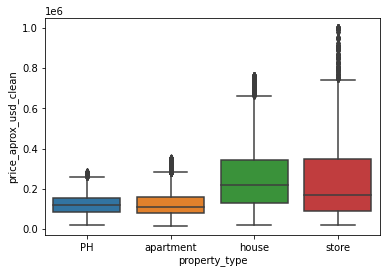

In [ ]:
sns.boxplot("property_type", "price_aprox_usd_clean", data= data_clean);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


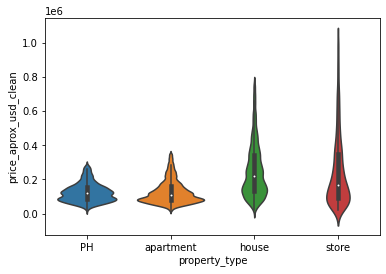

In [ ]:
sns.violinplot("property_type", "price_aprox_usd_clean", data= data_clean);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

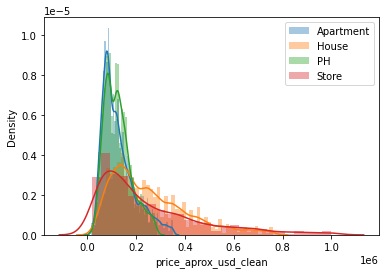

In [ ]:
serie_apartment_price = data_clean[mask_property_apartment].price_aprox_usd_clean
serie_house_price = data_clean[mask_property_house].price_aprox_usd_clean
serie_ph_price = data_clean[mask_property_ph].price_aprox_usd_clean
serie_store_price = data_clean[mask_property_store].price_aprox_usd_clean

sns.distplot(serie_apartment_price, label='Apartment')
sns.distplot(serie_house_price, label='House')
sns.distplot(serie_ph_price, label='PH')
sns.distplot(serie_store_price, label='Store')
plt.legend();

Al realizar un jointplot de superficie vs precio nos encontramos que los valores están muy concentrados por debajo de 200 m² y 400 kUSD, por lo que hicimos una máscara para ver bien esa zona.      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


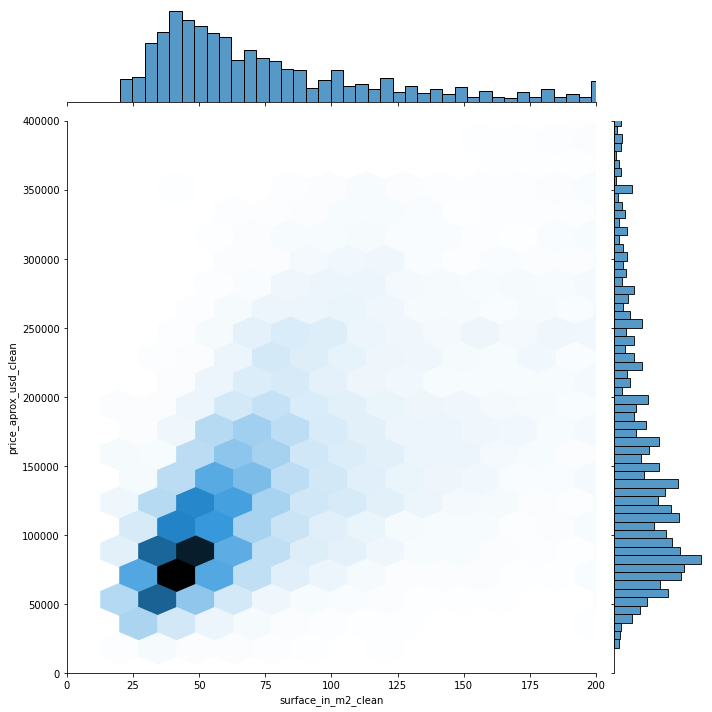

In [ ]:
sns.jointplot('surface_in_m2_clean', 'price_aprox_usd_clean', data_clean, xlim= (0, 200), ylim= (0, 4e5), height= 10, kind='hex');

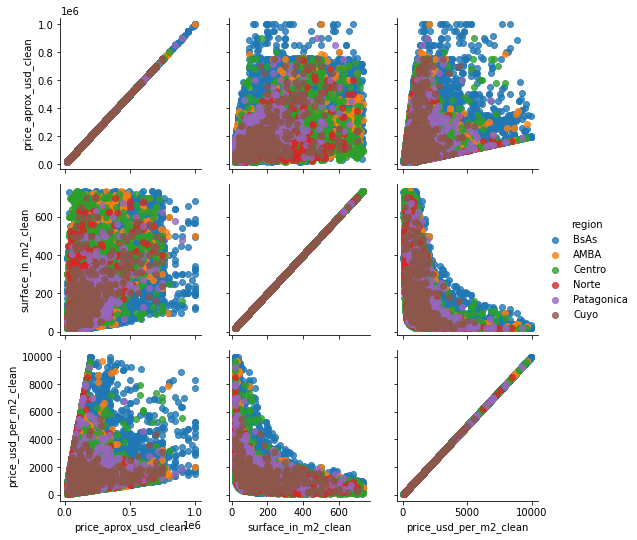

In [ ]:
pairGrid = sns.PairGrid(data_clean, vars=['price_aprox_usd_clean', 'surface_in_m2_clean', 'price_usd_per_m2_clean'], hue='region')

pairGrid.map(plt.scatter, alpha=0.8)
pairGrid.add_legend();

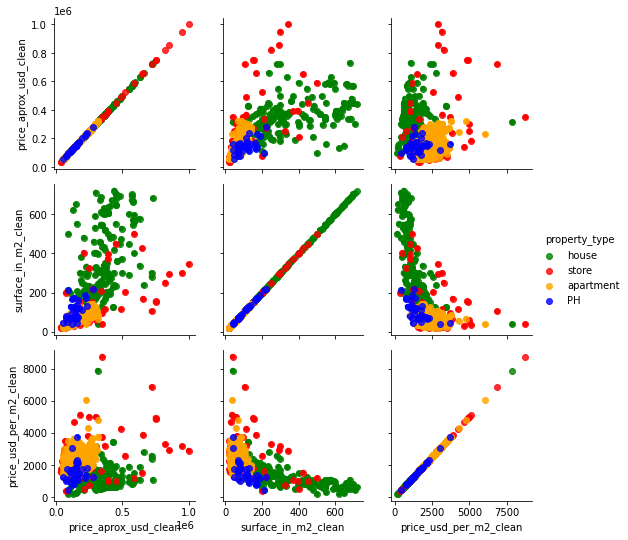

In [ ]:
#pivot_capital = pd.pivot_table(data_clean, index=['region','property_type'])

#pivot_capital

keys_property_type = data_clean["property_type"].unique()
color_property_type = ["blue", "orange", "green", "red"]
dict_property_type = dict(zip(keys_property_type, color_property_type ))

pairGrid = sns.PairGrid(data_clean[data_clean['place_name_clean'] == 'Capital Federal'], vars= ['price_aprox_usd_clean', 'surface_in_m2_clean', 'price_usd_per_m2_clean'], hue='property_type', palette=dict_property_type)
pairGrid.map_offdiag(sns.scatterplot)
pairGrid.map(plt.scatter, alpha=0.8)
pairGrid.add_legend();

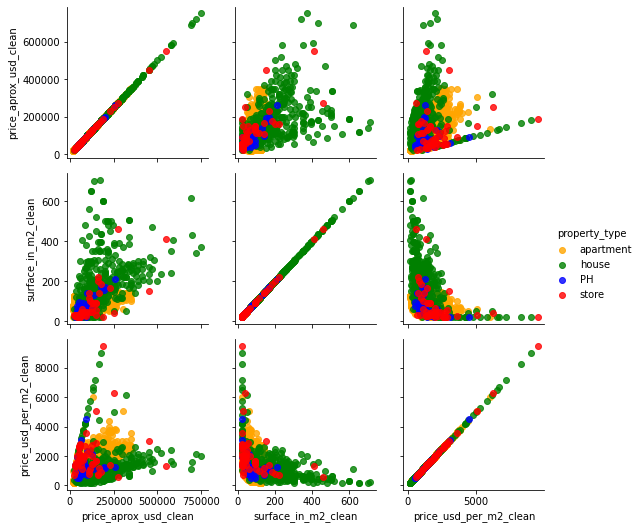

In [ ]:
pairGrid = sns.PairGrid(data_clean[data_clean['place_name_clean'] == 'Rosario'], vars=['price_aprox_usd_clean', 'surface_in_m2_clean', 'price_usd_per_m2_clean'], hue='property_type', palette=dict_property_type)
pairGrid.map(plt.scatter, alpha=0.8)
pairGrid.add_legend();

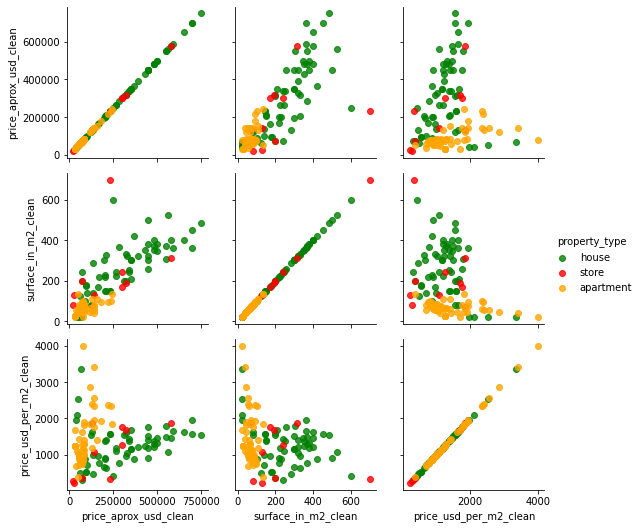

In [ ]:
pairGrid = sns.PairGrid(data_clean[data_clean['place_name_clean'] == 'Mendoza'], vars=['price_aprox_usd_clean', 'surface_in_m2_clean', 'price_usd_per_m2_clean'], hue='property_type', palette=dict_property_type)

pairGrid.map(plt.scatter, alpha=0.8)
pairGrid.add_legend();

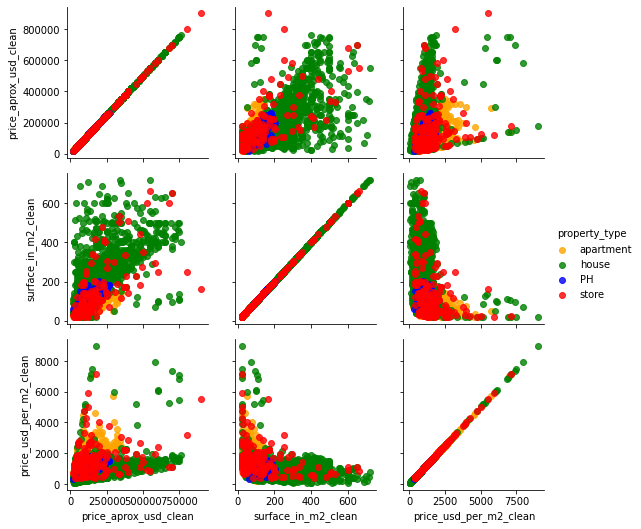

In [ ]:
pairGrid = sns.PairGrid(data_clean[data_clean['place_name_clean'] == 'Córdoba'], vars=['price_aprox_usd_clean', 'surface_in_m2_clean', 'price_usd_per_m2_clean'], hue='property_type', palette=dict_property_type)

pairGrid.map(plt.scatter, alpha=0.8)
pairGrid.add_legend();

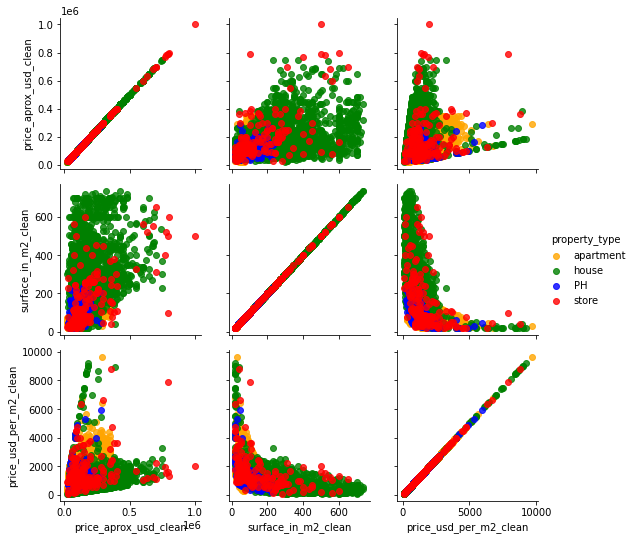

In [ ]:
pairGrid = sns.PairGrid(data_clean[data_clean['region'] == 'AMBA'], vars=['price_aprox_usd_clean', 'surface_in_m2_clean', 'price_usd_per_m2_clean'], hue='property_type', palette=dict_property_type
                    )

pairGrid.map(plt.scatter, alpha=0.8)
pairGrid.add_legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


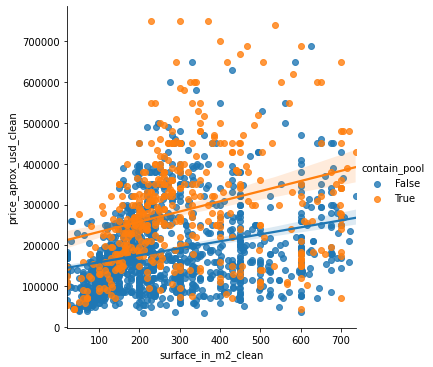

In [ ]:
data_clean_amba_house = data_clean[(data_clean['region'] == 'AMBA') & (data_clean['property_type'] == 'house')]
data_clean_amba_house['contain_pool'] = data_clean_amba_house.ammenity_clean.str.contains('PILETA')

sns.lmplot(x= "surface_in_m2_clean", y= "price_aprox_usd_clean", hue= 'contain_pool', data= data_clean_amba_house);

<a id="section_13"></a> 
# 13- Vista a futuro, variables dummies
[volver a TOC](#section_toc)

En esta sección armaremos las variables dummies para la próxima parte del desafío.

Dummies de tipo de propiedad:

In [ ]:
onehot_encoder = OneHotEncoder(drop='first', dtype= int)

dummy_property_type = onehot_encoder.fit_transform(data_clean[['property_type']])  # Hacemos la transformación a la matriz dispersa

dummy_property_type = pd.DataFrame(dummy_property_type.toarray(), columns= data_clean['property_type'].unique()[1:])  # Convertimos la matriz en array y luego en df, tomando como cols los nombres de las categorías
display(dummy_property_type.head(5))

,apartment,house,store
0,0,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,1,0,0


In [ ]:
data_clean_dummies = pd.concat([data_clean, dummy_property_type], axis=1)  # Agregamos estas columnas al df

In [ ]:
data_clean_dummies.head(3)

,property_type,place_with_parent_names,region,state_name,place_name_clean,lat,lon,rooms,ammenity_clean,price_aprox_usd_clean,surface_in_m2_clean,price_usd_per_m2_clean,properati_url,description,title,imputados,apartment,house,store
0,PH,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.661824,-58.508839,2.0,NaN,62000.0,55.0,1127.272727,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1,0,0,0
1,apartment,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.652262,-58.522982,2.0,NaN,72000.0,55.0,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1,1,0,0
2,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,AMBA,Buenos Aires Costa Atlántica,Mar del Plata,-38.002626,-57.549447,0.0,NaN,64000.0,35.0,1828.571429,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,0,1,0,0


Aparte de hacer dummies de amenities, queremos una columna que indique si la propiedad posee al menos una:

In [ ]:
data_clean_dummies['have_amenities'] = 0  # Creamos una columna para saber si la propiedad tiene o no amenities

data_clean_dummies.loc[data_clean_dummies['ammenity_clean'].isna(), 'ammenity_clean'] = ''  # Los nulos los transformamos en un str vacío

mask_have_ammenities = data_clean_dummies['ammenity_clean'] != ''  # Si no es un str vacío, la máscara es True
data_clean_dummies.loc[mask_have_ammenities, 'have_amenities'] = 1  # Para estas filas, cambiamos el valor de la col have_amenities a 1
data_clean_dummies.loc[:,['have_amenities','ammenity_clean']].head(5)

,have_amenities,ammenity_clean
0,0,
1,0,
2,0,
3,0,
4,1,PILETA|LAUNDRY


Ahora queremos hacer las dummies de cada amenity individual

In [ ]:
# Tenemos más de un nombre para algunos tipos de amenity, los ponemos en este dict con key= el nombre que le queremos dar,
# value= posibles nombres con el que podemos encontrar ese tipo de amenity.

arr_names_ammenities = {'parrilla' : ['ASADOR', 'PARRILLA'], 'cochera' : ['COCHERA'], 'gimnasio' : ['GIMNASIO'], \
                        'laundry' : ['LAUNDRY'], 'pileta' : ['PILETA', 'PISCINA'], 'quincho' : ['QUINCHO'], \
                        'sum' : ['SUM', 'S.U.M'], 'sauna' : ['SAUNA'], 'terraza' : ['TERRAZA']}                     

# Con estos loops nos formamos las dummies para cada tipo de amenity. En el primer loop creamos una columna cuyo nombre
# es la key, y la inicializamos como 0. Dentro de esa columna, el segundo loop chequea si el value de la key está conte-
# nido en la columna de amenities. Si está presente, la máscara es True y para esos index asignamos el valor 1. Si no en-
# cuentra el value lo ignora (queda el valor 0, asignado en el loop exterior).

for key, value in arr_names_ammenities.items():
    data_clean_dummies[key] = 0
    for i in value:
        data_clean_dummies.loc[data_clean_dummies['ammenity_clean'].str.contains(i, regex=False), key] = 1

In [ ]:
data_clean_dummies.head(5)

,property_type,place_with_parent_names,region,state_name,place_name_clean,lat,lon,rooms,ammenity_clean,price_aprox_usd_clean,surface_in_m2_clean,price_usd_per_m2_clean,properati_url,description,title,imputados,apartment,house,store,have_amenities,parrilla,cochera,gimnasio,laundry,pileta,quincho,sum,sauna,terraza
0,PH,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.661824,-58.508839,2.0,,62000.0,55.0,1127.272727,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,apartment,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.652262,-58.522982,2.0,,72000.0,55.0,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,AMBA,Buenos Aires Costa Atlántica,Mar del Plata,-38.002626,-57.549447,0.0,,64000.0,35.0,1828.571429,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,BsAs,Bs.As. G.B.A. Zona Norte,Vicente López,-34.532957,-58.521782,0.0,,130000.0,106.0,1226.415094,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,apartment,|Argentina|Capital Federal|Belgrano|,BsAs,Capital Federal,Belgrano,-34.559873,-58.443362,1.0,PILETA|LAUNDRY,138000.0,45.0,3066.666667,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,1,1,0,0,1,0,0,0,1,1,0,0,0,0


Ahora creamos las dummies de ambientes. Se asigna el valor de 0 ambientes en el caso de que no conozcamos este dato o bien sean outliers. Notar que en este caso tiramos la k-ésima variable dummy a mano pues específicamente queremos descartar el valor ```rooms == 0```.

In [ ]:
onehot_encoder2 = OneHotEncoder(dtype= int)  # Todavía no vamos a dropear una variable
dummy_rooms = onehot_encoder2.fit_transform(data_clean_dummies[['rooms']])  # Hacemos la transformación a la matriz dispersa
cols = onehot_encoder2.get_feature_names(['rooms'])  # Guardamos los nombres de las columnas aquí

dummy_rooms = pd.DataFrame(dummy_rooms.toarray(), columns=cols)  # Convertimos la matriz en array y luego en df, tomando como cols los nombres de las categorías
dummy_rooms = dummy_rooms.drop("rooms_0.0", axis=1)  # Descartamos la k-ésima variable dummy.
display(dummy_rooms.head(5))

data_clean_dummies = pd.concat([data_clean_dummies, dummy_rooms], axis=1)

display(data_clean_dummies.head(5))

,rooms_1.0,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


,property_type,place_with_parent_names,region,state_name,place_name_clean,lat,lon,rooms,ammenity_clean,price_aprox_usd_clean,surface_in_m2_clean,price_usd_per_m2_clean,properati_url,description,title,imputados,apartment,house,store,have_amenities,parrilla,cochera,gimnasio,laundry,pileta,quincho,sum,sauna,terraza,rooms_1.0,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0
0,PH,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.661824,-58.508839,2.0,,62000.0,55.0,1127.272727,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,apartment,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.652262,-58.522982,2.0,,72000.0,55.0,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,AMBA,Buenos Aires Costa Atlántica,Mar del Plata,-38.002626,-57.549447,0.0,,64000.0,35.0,1828.571429,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,BsAs,Bs.As. G.B.A. Zona Norte,Vicente López,-34.532957,-58.521782,0.0,,130000.0,106.0,1226.415094,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,apartment,|Argentina|Capital Federal|Belgrano|,BsAs,Capital Federal,Belgrano,-34.559873,-58.443362,1.0,PILETA|LAUNDRY,138000.0,45.0,3066.666667,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
per_null_data(data_clean_dummies)

property_type               0.00
place_with_parent_names     0.00
region                      0.00
state_name                  0.00
place_name_clean            0.00
lat                        41.21
lon                        41.21
rooms                       0.00
ammenity_clean              0.00
price_aprox_usd_clean       0.00
surface_in_m2_clean         0.00
price_usd_per_m2_clean      0.00
properati_url               0.00
description                 0.00
title                       0.00
imputados                   0.00
apartment                   0.00
house                       0.00
store                       0.00
have_amenities              0.00
parrilla                    0.00
cochera                     0.00
gimnasio                    0.00
laundry                     0.00
pileta                      0.00
quincho                     0.00
sum                         0.00
sauna                       0.00
terraza                     0.00
rooms_1.0                   0.00
rooms_2.0 

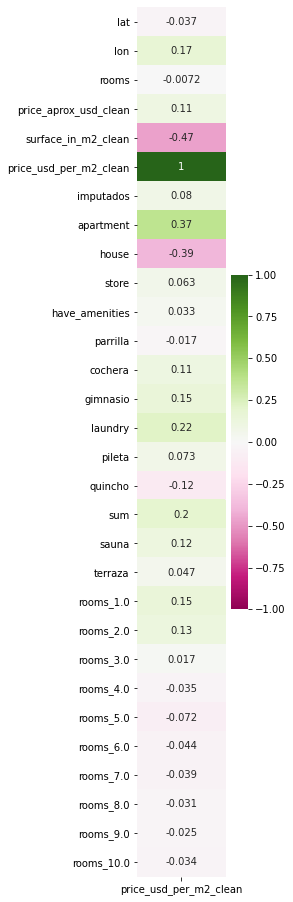

In [ ]:
plt.figure(figsize=(2, 16))
sns.heatmap(data_clean_dummies.corr()[5:6].transpose(), cmap='PiYG', annot=True, center= 0, vmin= -1, vmax= 1);

Agregamos dummies por provincia:

In [ ]:
onehot_encoder3 = OneHotEncoder(drop='first', dtype=int)
dummy_state_name = onehot_encoder3.fit_transform(data_clean_dummies[['state_name']])

cols = onehot_encoder3.get_feature_names(['state'])
dummy_state_name = pd.DataFrame(dummy_state_name.toarray(), columns=cols)
dummy_state_name.head(5)

,state_Bs.As. G.B.A. Zona Oeste,state_Bs.As. G.B.A. Zona Sur,state_Buenos Aires Costa Atlántica,state_Buenos Aires Interior,state_Capital Federal,state_Catamarca,state_Chaco,state_Chubut,state_Corrientes,state_Córdoba,state_Entre Ríos,state_Formosa,state_Jujuy,state_La Pampa,state_La Rioja,state_Mendoza,state_Misiones,state_Neuquén,state_Río Negro,state_Salta,state_San Juan,state_San Luis,state_Santa Cruz,state_Santa Fe,state_Santiago Del Estero,state_Tierra Del Fuego,state_Tucumán
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concatenamos al dataframe inicial 

data_clean_dummies = pd.concat([data_clean_dummies, dummy_state_name], axis=1)
data_clean_dummies.head(5)

,property_type,place_with_parent_names,region,state_name,place_name_clean,lat,lon,rooms,ammenity_clean,price_aprox_usd_clean,surface_in_m2_clean,price_usd_per_m2_clean,properati_url,description,title,imputados,apartment,house,store,have_amenities,parrilla,cochera,gimnasio,laundry,pileta,quincho,sum,sauna,terraza,rooms_1.0,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0,state_Bs.As. G.B.A. Zona Oeste,state_Bs.As. G.B.A. Zona Sur,state_Buenos Aires Costa Atlántica,state_Buenos Aires Interior,state_Capital Federal,state_Catamarca,state_Chaco,state_Chubut,state_Corrientes,state_Córdoba,state_Entre Ríos,state_Formosa,state_Jujuy,state_La Pampa,state_La Rioja,state_Mendoza,state_Misiones,state_Neuquén,state_Río Negro,state_Salta,state_San Juan,state_San Luis,state_Santa Cruz,state_Santa Fe,state_Santiago Del Estero,state_Tierra Del Fuego,state_Tucumán
0,PH,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.661824,-58.508839,2.0,,62000.0,55.0,1127.272727,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,apartment,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.652262,-58.522982,2.0,,72000.0,55.0,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,AMBA,Buenos Aires Costa Atlántica,Mar del Plata,-38.002626,-57.549447,0.0,,64000.0,35.0,1828.571429,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,BsAs,Bs.As. G.B.A. Zona Norte,Vicente López,-34.532957,-58.521782,0.0,,130000.0,106.0,1226.415094,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,apartment,|Argentina|Capital Federal|Belgrano|,BsAs,Capital Federal,Belgrano,-34.559873,-58.443362,1.0,PILETA|LAUNDRY,138000.0,45.0,3066.666667,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


En las columnas `state_name` y `place_name_clean` encontramos la provincia y el barrio o municipio respectivamente. Para C.A.B.A., algunas entradas tienen `Capital Federal` como barrio, y para nuestro análisis por barrio, no nos sirven. Si representan una pequeña porción del total, vamos a descartar estas filas.

In [ ]:
# Vamos a ver qué porcentaje de índices tienen "Capital Federal" en `place_name_clean` respecto a todos los índices con "Capital Federal" en
# `state_name`

place_is_capital = (data_clean_dummies.place_name_clean == "Capital Federal").sum()
state_is_capital = (data_clean_dummies.state_name == "Capital Federal").sum()

print((100 * place_is_capital / state_is_capital).round(2))

2.68


Efectivamente perdemos sólo el 2,7% de los datos si los dropeamos; procedemos entonces.

In [ ]:
# Estas entradas las vamos a descartar.

data_clean_dummies.drop(index= data_clean_dummies[data_clean_dummies.place_name_clean == "Capital Federal"].index, inplace= True)

data_clean_dummies.reset_index(drop=True, inplace=True)

print((data_clean_dummies.place_name_clean == "Capital Federal").any())  # Chequeamos que efectivamente dropeamos estos índices

False


In [ ]:
# Mascara para filtrar state_name solo por Capital Federal 

# Creamos una columna nueva de barrios para caba, inicializado como string vacío
data_clean_dummies['barrio_cf_dummy'] = ''
mask_state_caba = data_clean_dummies["state_name"] == "Capital Federal"

# Cambiamos el str vacío por el valor de la columna `place_name_clean` para los índices de caba
data_clean_dummies['barrio_cf_dummy'] = data_clean_dummies.loc[mask_state_caba, "place_name_clean"]

In [ ]:
# Chequeamos si hay valores NaN
data_clean_dummies.barrio_cf_dummy.isna().value_counts()

True     60013
False    22768
Name: barrio_cf_dummy, dtype: int64

In [ ]:
# A los NaN también los cambiamos por un str vacío
data_clean_dummies.loc[data_clean_dummies.barrio_cf_dummy.isna(), 'barrio_cf_dummy'] = ''

data_clean_dummies.barrio_cf_dummy.notna().all()  # ¿Son todos no nulos?

True

Creamos un nuevo dataframe solo de capital federal para trabajar por barrios:

In [ ]:
df_capital_federal = data_clean_dummies.loc[mask_state_caba]

df_capital_federal.reset_index(drop=True, inplace=True)

print(df_capital_federal.shape)
display(df_capital_federal.head(5))

(22768, 67)


,property_type,place_with_parent_names,region,state_name,place_name_clean,lat,lon,rooms,ammenity_clean,price_aprox_usd_clean,surface_in_m2_clean,price_usd_per_m2_clean,properati_url,description,title,imputados,apartment,house,store,have_amenities,parrilla,cochera,gimnasio,laundry,pileta,quincho,sum,sauna,terraza,rooms_1.0,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0,state_Bs.As. G.B.A. Zona Oeste,state_Bs.As. G.B.A. Zona Sur,state_Buenos Aires Costa Atlántica,state_Buenos Aires Interior,state_Capital Federal,state_Catamarca,state_Chaco,state_Chubut,state_Corrientes,state_Córdoba,state_Entre Ríos,state_Formosa,state_Jujuy,state_La Pampa,state_La Rioja,state_Mendoza,state_Misiones,state_Neuquén,state_Río Negro,state_Salta,state_San Juan,state_San Luis,state_Santa Cruz,state_Santa Fe,state_Santiago Del Estero,state_Tierra Del Fuego,state_Tucumán,barrio_cf_dummy
0,PH,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.661824,-58.508839,2.0,,62000.0,55.0,1127.272727,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mataderos
1,apartment,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.652262,-58.522982,2.0,,72000.0,55.0,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mataderos
2,apartment,|Argentina|Capital Federal|Belgrano|,BsAs,Capital Federal,Belgrano,-34.559873,-58.443362,1.0,PILETA|LAUNDRY,138000.0,45.0,3066.666667,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Belgrano
3,apartment,|Argentina|Capital Federal|Belgrano|,BsAs,Capital Federal,Belgrano,-34.559873,-58.443362,0.0,PILETA|LAUNDRY,195000.0,65.0,3000.000000,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Belgrano
4,apartment,|Argentina|Capital Federal|Palermo|Palermo Soho|,BsAs,Capital Federal,Palermo,NaN,NaN,1.0,TERRAZA|PILETA|SAUNA|GIMNASIO,111700.0,50.0,2234.000000,http://www.properati.com.ar/15bp9_venta_depart...,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Palermo


In [ ]:
# Dummies de barrios de capital

onehot_encoder4 = OneHotEncoder(drop='first', dtype= int)
dummy_barrio_capital_federal = onehot_encoder4.fit_transform(df_capital_federal[['barrio_cf_dummy']])

cols = onehot_encoder4.get_feature_names(['barrio'])
dummy_barrio_capital_federal = pd.DataFrame(dummy_barrio_capital_federal.toarray(), columns= cols)

# Revisamos que esté todo bien
display(dummy_barrio_capital_federal.head(5))
print(dummy_barrio_capital_federal.shape)

,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,barrio_Belgrano,barrio_Boca,barrio_Boedo,barrio_Caballito,barrio_Catalinas,barrio_Centro / Microcentro,barrio_Chacarita,barrio_Coghlan,barrio_Colegiales,barrio_Congreso,barrio_Constitución,barrio_Flores,barrio_Floresta,barrio_Las Cañitas,barrio_Liniers,barrio_Mataderos,barrio_Monserrat,barrio_Monte Castro,barrio_Nuñez,barrio_Once,barrio_Palermo,barrio_Parque Avellaneda,barrio_Parque Centenario,barrio_Parque Chacabuco,barrio_Parque Chas,barrio_Parque Patricios,barrio_Paternal,barrio_Pompeya,barrio_Puerto Madero,barrio_Recoleta,barrio_Retiro,barrio_Saavedra,barrio_San Cristobal,barrio_San Nicolás,barrio_San Telmo,barrio_Tribunales,barrio_Velez Sarsfield,barrio_Versalles,barrio_Villa Crespo,barrio_Villa Devoto,barrio_Villa General Mitre,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(22768, 56)


In [ ]:
# Concatenamos al dataframe de capital 

df_capital_federal = pd.concat([df_capital_federal, dummy_barrio_capital_federal], axis=1)

cols_to_drop = ["state_Bs.As. G.B.A. Zona Oeste", "state_Bs.As. G.B.A. Zona Sur", "state_Buenos Aires Costa Atlántica", \
                "state_Buenos Aires Interior", "state_Capital Federal", "state_Catamarca", "state_Chaco", "state_Chubut", \
                "state_Corrientes", "state_Córdoba", "state_Entre Ríos", "state_Formosa", "state_Jujuy", "state_La Pampa", \
                "state_La Rioja", "state_Mendoza", "state_Misiones", "state_Neuquén", "state_Río Negro", "state_Salta", \
                "state_San Juan", "state_San Luis", "state_Santa Cruz", "state_Santa Fe", "state_Santiago Del Estero", \
                "state_Tierra Del Fuego", "state_Tucumán"]

df_capital_federal.drop(columns= cols_to_drop, inplace= True)

display(df_capital_federal.head(5))

df_capital_federal.shape

,property_type,place_with_parent_names,region,state_name,place_name_clean,lat,lon,rooms,ammenity_clean,price_aprox_usd_clean,surface_in_m2_clean,price_usd_per_m2_clean,properati_url,description,title,imputados,apartment,house,store,have_amenities,parrilla,cochera,gimnasio,laundry,pileta,quincho,sum,sauna,terraza,rooms_1.0,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0,barrio_cf_dummy,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,barrio_Belgrano,barrio_Boca,barrio_Boedo,barrio_Caballito,barrio_Catalinas,barrio_Centro / Microcentro,barrio_Chacarita,barrio_Coghlan,barrio_Colegiales,barrio_Congreso,barrio_Constitución,barrio_Flores,barrio_Floresta,barrio_Las Cañitas,barrio_Liniers,barrio_Mataderos,barrio_Monserrat,barrio_Monte Castro,barrio_Nuñez,barrio_Once,barrio_Palermo,barrio_Parque Avellaneda,barrio_Parque Centenario,barrio_Parque Chacabuco,barrio_Parque Chas,barrio_Parque Patricios,barrio_Paternal,barrio_Pompeya,barrio_Puerto Madero,barrio_Recoleta,barrio_Retiro,barrio_Saavedra,barrio_San Cristobal,barrio_San Nicolás,barrio_San Telmo,barrio_Tribunales,barrio_Velez Sarsfield,barrio_Versalles,barrio_Villa Crespo,barrio_Villa Devoto,barrio_Villa General Mitre,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
0,PH,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.661824,-58.508839,2.0,,62000.0,55.0,1127.272727,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Mataderos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,apartment,|Argentina|Capital Federal|Mataderos|,BsAs,Capital Federal,Mataderos,-34.652262,-58.522982,2.0,,72000.0,55.0,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Mataderos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,apartment,|Argentina|Capital Federal|Belgrano|,BsAs,Capital Federal,Belgrano,-34.559873,-58.443362,1.0,PILETA|LAUNDRY,138000.0,45.0,3066.666667,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Belgrano,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,apartment,|Argentina|Capital Federal|Belgrano|,BsAs,Capital Federal,Belgrano,-34.559873,-58.443362,0.0,PILETA|LAUNDRY,195000.0,65.0,3000.000000,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Belgrano,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,apartment,|Argentina|Capital Federal|Palermo|Palermo Soho|,BsAs,Capital Federal,Palermo,NaN,NaN,1.0,TERRAZA|PILETA|SAUNA|GIMNASIO,111700.0,50.0,2234.000000,http://www.properati.com.ar/15bp9_venta_depart...,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,Palermo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(22768, 96)

In [ ]:
# Esta celda está por completitud, no debe correrse ya que estos DataFrames están en la carpeta de Drive y pueden accederse desde allí

# data_clean_dummies.to_csv('../Data/data_clean_final.csv', index=False)
# df_capital_federal.to_csv('../Data/df_capital_federal.csv', index=False)